<a href="https://colab.research.google.com/github/grandpa23/lab3/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
%%bash
dot -Tpng -Gsize=9,15\! -Gdpi=200 -olab3.png lab3.dot

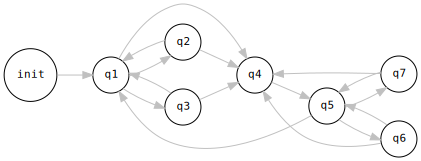

In [9]:
from graphviz import Source
with open("./lab3.dot", "r") as f:
    gr = Source(f.read())
gr

In [1]:
def prime(fn):
    def wrapper(*args, **kwargs):
        v = fn(*args, **kwargs)
        v.send(None)
        return v
    return wrapper

In [2]:
import time

class Lifter:
    def __init__(self, numStage, stageL, t):
        self.t = t
        self.height = numStage
        self.cur_stage = stageL
        self.start = None
        self.end = None
        self.exitable = None
        self.init = self._create_init()
        self.q1 = self._create_q1()
        self.q2 = self._create_q2()
        self.q3 = self._create_q3()
        self.q4 = self._create_q4()
        self.q5 = self._create_q5()
        self.q6 = self._create_q6()
        self.q7 = self._create_q7()
        self.current_state = self.init
        
    def send(self, pair):
        self.start = pair[0]
        self.end = pair[1]
        self.current_state.send(pair)
        
    def exit(self):
        if self.exitable:
          self.exitable = False
          return True
    @prime
    def _create_q1(self):
        while True:
            pair = yield
            self.exitable = False
            if  self.start > self.cur_stage:
                print(f'Лифт {self.t} поднимается на {self.cur_stage + 1}...')
                time.sleep(1)
                self.cur_stage += 1
                self.current_state = self.q2
            elif self.start < self.cur_stage:
                print(f'Лифт {self.t} спускается на {self.cur_stage - 1}...')
                time.sleep(1)
                self.cur_stage -= 1
                self.current_state = self.q3
            elif  self.start == self.cur_stage:
                print(f'Лифт {self.t} прибыл на этаж вызова...')
                self.current_state = self.q4

    @prime
    def _create_q2(self):
        while True:
            pair = yield
            if  self.start > self.cur_stage:
                self.current_state = self.q1
            elif  self.start == self.cur_stage:
                print(f'Лифт {self.t} прибыл на этаж вызова...')
                self.current_state = self.q4
    @prime
    def _create_q3(self):
        while True:
            pair = yield
            if  self.start < self.cur_stage:
                self.current_state = self.q1
            elif  self.start == self.cur_stage:
                print(f'Лифт {self.t} прибыл на этаж вызова...')
                self.current_state = self.q4
    @prime
    def _create_q4(self):
        while True:
            pair = yield
            print(f'Двери лифта {self.t} открываются...')
            time.sleep(1)
            self.current_state = self.q5
            print(f'Двери лифта {self.t} закрываются...')
            time.sleep(1)
    @prime
    def _create_q5(self):
        while True:
            pair = yield
            if  self.t == '2' and self.end > self.cur_stage:
                print(f'Лифт {self.t} поднимается на {self.cur_stage + 1}...')
                time.sleep(1)
                self.cur_stage += 1
                self.current_state = self.q6
            elif self.t == '1' and self.end < self.cur_stage:
                print(f'Лифт {self.t} спускается на {self.cur_stage - 1}...')
                time.sleep(1)
                self.cur_stage -= 1
                self.current_state = self.q7
            elif self.end == self.cur_stage:
                print(f'Лифт {self.t} ожидает следующий вызов...')
                self.exitable = True
                self.current_state = self.q1

    @prime
    def _create_q6(self):
        while True:
            pair = yield
            if  self.end > self.cur_stage:
                self.current_state = self.q5
            elif  self.end == self.cur_stage:
                print(f'Лифт {self.t} прибыл на требуемый этаж...')
                self.current_state = self.q4    

    @prime
    def _create_q7(self):
        while True:
            pair = yield
            if  self.end < self.cur_stage:
                self.current_state = self.q5
            elif  self.end == self.cur_stage:
                print(f'Лифт {self.t} прибыл на требуемый этаж...')
                self.current_state = self.q4 

    @prime
    def _create_init(self):
        while True:
            pair = yield
            print(f'Лифт {self.t} ожидает...')
            self.start = pair[0]
            self.end = pair[1]
            if self.start < 1 or self.end > self.height or self.start > self.height or self.end < 1:
              print(f'Лифт {self.t} может совершать движение только от 1-го до {self.height}-го этажа')
              self.current_state = self.init
            self.current_state = self.q1

In [3]:
import random

height = random.randint(5, 50)
pairs = []
for _ in range(5):
  s = random.randint(1, height)
  e = random.randint(1, height)
  while s == e:
    e = random.randint(1, height)
  pairs.append([s,e])
Left = list(filter(lambda x: x[0] > x[1], pairs))
Right = list(filter(lambda x: x[0] < x[1], pairs))

In [4]:
def Lift(arr, curL, t):
  evaluator = Lifter(height, curL, t)
  for pair in arr:
      print(pair)
      ts = time.time()
      while not evaluator.exit():
        evaluator.send(pair)
      print(pair, time.time() - ts)
  return

In [5]:
import threading

t1 = threading.Thread(target=Lift, args=(Left, random.randint(5, 50), '1',))
t2 = threading.Thread(target=Lift, args=(Right, random.randint(5, 50), '2',))
t1.start()
t2.start()
t1.join()
t2.join()

[3, 1]
Лифт 1 ожидает...
Лифт 1 спускается на 28...
[1, 6]
Лифт 2 ожидает...
Лифт 2 спускается на 21...
Лифт 1 спускается на 27...
Лифт 2 спускается на 20...
Лифт 1 спускается на 26...
Лифт 2 спускается на 19...
Лифт 1 спускается на 25...
Лифт 2 спускается на 18...
Лифт 1 спускается на 24...
Лифт 2 спускается на 17...
Лифт 1 спускается на 23...
Лифт 2 спускается на 16...
Лифт 1 спускается на 22...
Лифт 2 спускается на 15...
Лифт 1 спускается на 21...
Лифт 2 спускается на 14...
Лифт 1 спускается на 20...
Лифт 2 спускается на 13...
Лифт 1 спускается на 19...
Лифт 2 спускается на 12...
Лифт 1 спускается на 18...
Лифт 2 спускается на 11...
Лифт 1 спускается на 17...
Лифт 2 спускается на 10...
Лифт 1 спускается на 16...
Лифт 2 спускается на 9...
Лифт 1 спускается на 15...
Лифт 2 спускается на 8...
Лифт 1 спускается на 14...
Лифт 2 спускается на 7...
Лифт 1 спускается на 13...
Лифт 2 спускается на 6...
Лифт 1 спускается на 12...
Лифт 2 спускается на 5...
Лифт 1 спускается на 11...
Лифт 2 спу